# **Project Name - Customer Segmentation Data for Marketing Analysis**

### **Project Type - Exploratory Data Analysis (EDA)**

# **About the Dataset**

This dataset contains simulated customer data that can be used for segmentation analysis. It includes demographic and behavioral information about customers, which can help in identifying distinct segments within the customer base. This can be particularly useful for targeted marketing strategies, improving customer satisfaction, and increasing sales.

## **UNDERSTAND THE GIVEN VARIABLES**

**ID :-** Unique identifier for each customer.

**Age :-** Age of the customer.

**Gender :-** Gender of the customer (Male, Female, Other).

**Income :-** Annual income of the customer (in USD).

**Spending_score :-** Spending score (1-100), indicating the customer's spending behavior and loyalty.

**Membership_years :-** Number of years the customer has been a member.

**Purchase_frequency: :-** Number of purchases made by the customer in the last year.

**Preferred_category :-** Preferred shopping category (Electronics, Clothing, Groceries, Home & Garden, Sports).

**Last_purchase_amount :-** Amount spent by the customer on their last purchase (in USD).

The dataset is downloaded from Kaggle website and link of dataset is https://www.kaggle.com/datasets/fahmidachowdhury/customer-segmentation-data-for-marketing-analysis

# **Project Summary -**

*   **The purpose of the analysis:** is to get useful information from data. Here we are analyzing Customer Segmentation Data for Marketing Analysis
. The basic purpose of this analysis is to get answers of some business questions from this data set that can be helpful in future for success of a marketplace.

*   This project starts with exploring and cleaning a dataset to prepare it for analysis.  The data exploration process involved identifying and understanding the characteristics of the data, such as the data types, missing values, and distributions of values. The data cleaning process involved detecting and resolving  any issues  in the data, such as errors, missing values, or duplicate records and remove=ing outliers. 

*   Once the data has been cleaned and prepared, we will create visualizations graphs and check the relationship between different variables of the dataset.

*   We will perform exploratory data analysis (EDA) of this dataset that consists of three steps (1) Univariate Analysis (2) Bivariate Analysis (3) Multivariate Analysis.


In [2]:
#Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the dataset
df_cs = pd.read_csv('customer_segmentation_data.csv')

In [4]:
df_cs

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16


We will perform exploratory data analysis for this data. But before doing this process We will get more information about dataset like total
columns, their datatype, null values and which columns of dataset is necessary for this analysis. 

## **Data exploring and cleaning**

In [5]:
df_cs.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [6]:
df_cs.columns

Index(['id', 'age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
      dtype='object')

In [7]:
df_cs.shape

(1000, 9)

In [8]:
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


**By knowing the range of values, we can now determine the bits to store these values. For references:**

*   Int8 variables can hold values ranging from -128 to 127.

*   Int16 variables can hold values ranging from -32,768 to 32,767.

*   Int32 variables can hold values ranging from -2,147,483,648 to 2,147,483,647.

*   Int64 variables can store values ranging from -9,223,372,036,854,775,808 to 9,223,372,036,854,775,807.


**The Int32 is the perfect option because it fits the value range. We can still use Int64, but it’s not proper because it uses more memory 
and makes our DataFrame less efficient.**

**For floats, it’s a bit different because it really affects how many decimal places our data can store. Float16 stores 4 decimal digits, 
Float32 stores 8 decimal digits, and Float64 stores 16 decimal digits. The best option is to use Float16 because we don’t really need 
to use many decimal digits in our DataFrame, but we still want to 
keep the values same as the original.**

In [10]:
convert_disc = {'id' : 'int32', 'age' : 'int32', 'gender' : 'category', 'income' : 'int64', 
                'spending_score' : 'int16', 'membership_years' : 'int16',  'purchase_frequency' : 'int16', 'preferred_category' : 'string', }

In [11]:
df_cs = df_cs.astype(convert_disc)

In [13]:
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    1000 non-null   int32   
 1   age                   1000 non-null   int32   
 2   gender                1000 non-null   category
 3   income                1000 non-null   int64   
 4   spending_score        1000 non-null   int16   
 5   membership_years      1000 non-null   int16   
 6   purchase_frequency    1000 non-null   int16   
 7   preferred_category    1000 non-null   string  
 8   last_purchase_amount  1000 non-null   float64 
dtypes: category(1), float64(1), int16(3), int32(2), int64(1), string(1)
memory usage: 38.3 KB


In [14]:
df_cs.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [16]:
df_cs.isnull().sum()

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

**so there is no null value in dataset**

In [17]:
df_cs.duplicated().sum()

0

In [18]:
df_cs.nunique()

id                      1000
age                       52
gender                     3
income                   996
spending_score           100
membership_years          10
purchase_frequency        50
preferred_category         5
last_purchase_amount     994
dtype: int64

## **Exploratory Data Analysis**

Exploratory data analysis is import step in data analysis part. The main purpose of EDA is to extract useful informaion from
data. It gives us information about relationship between variables in dataset. EDA consists of three parts

*   Univariate Analysis

*   Bivariate Analysis.

*   Multivariate Analysis


# **Data Visualization**

# **Univariate Analysis**

It is the analysis of data by using one variable at a time of given dataset. By plotting the graph we can understand the data in better way. 

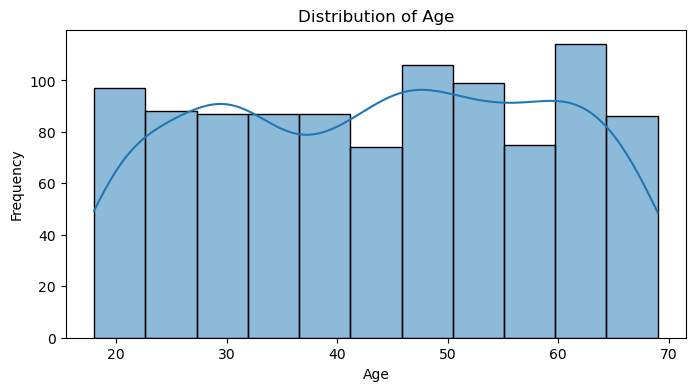

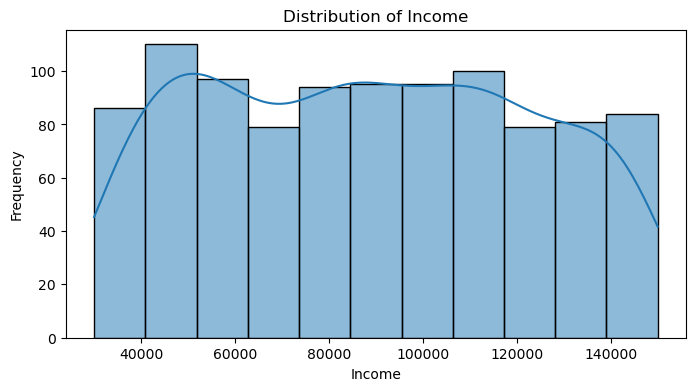

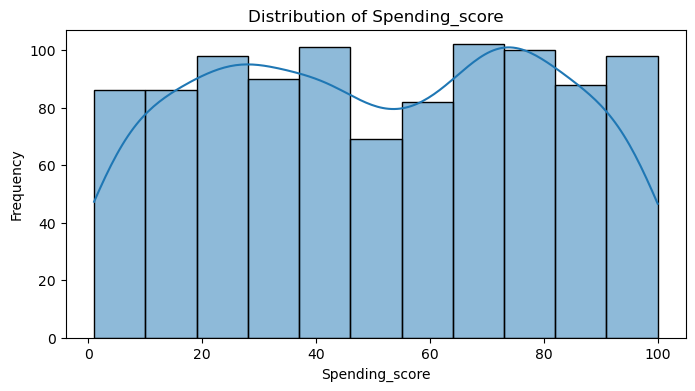

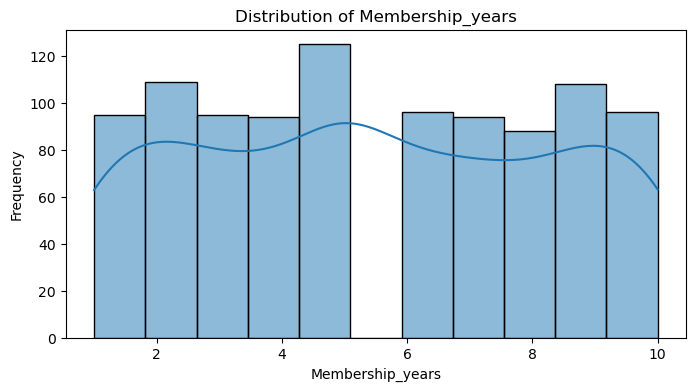

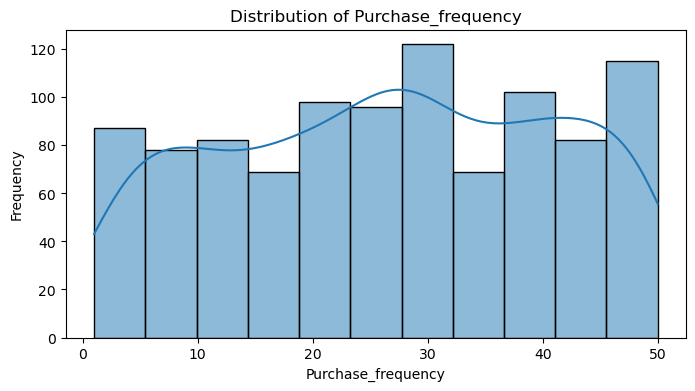

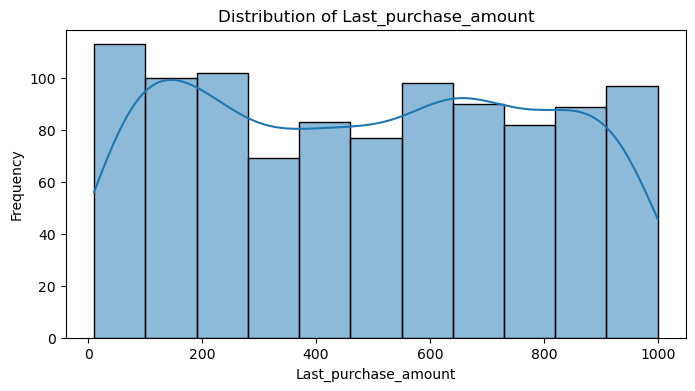

In [24]:
numerical_features_of_data = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']

for feature in numerical_features_of_data:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cs[feature], kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.show()

*   **Age:** As we see from graph the distribution is roughly uniform, indicating a wide range of ages among customers.

*   **Income** The distribution is right-skewed, with a higher frequency of customers in the lower income ranges.

*   **Spending Score** The distribution is right-skewed, with a higher frequency of customers in the lower income ranges.

*   **Membership Years** The distribution is left-skewed, with many customers having fewer years of membership.

*   **Purchase Frequency** The distribution is right-skewed, indicating that most customers have lower purchase frequencies.

*   **Last Purchase Amount** he distribution is right-skewed, with most customers making smaller purchases.


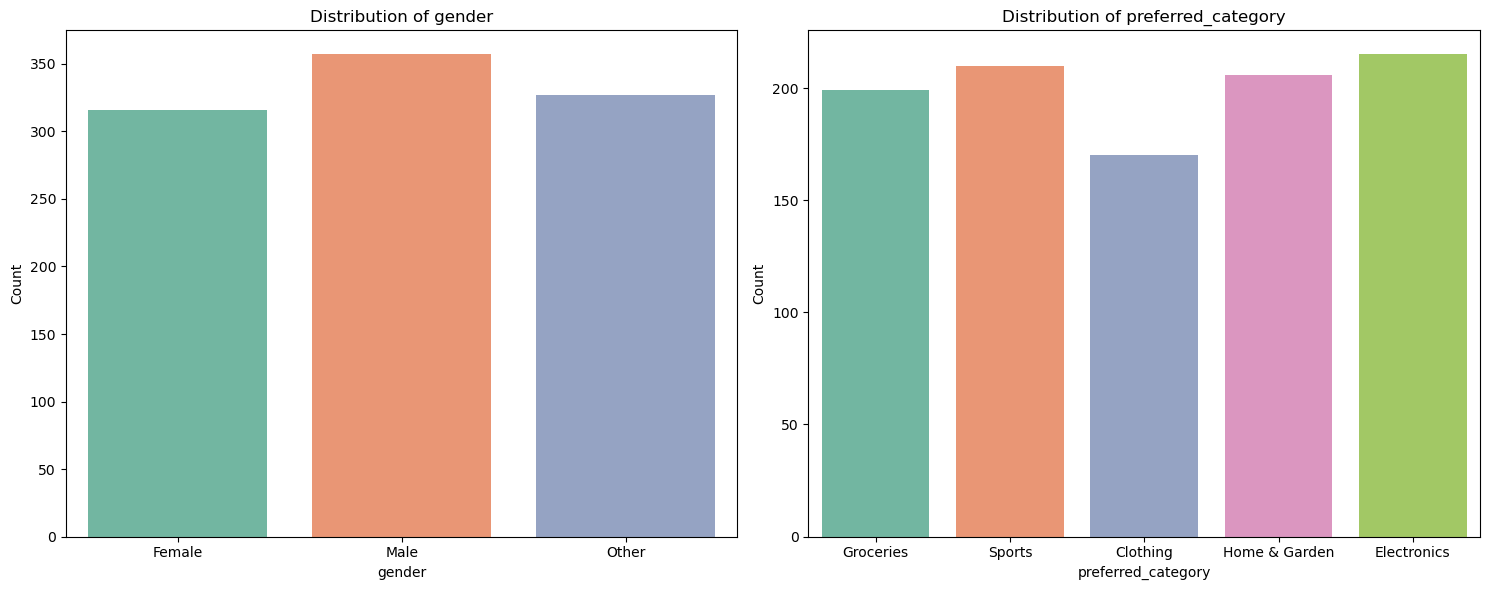

In [56]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 6))

# Plot count plots for categorical columns
categorical_columns = ['gender', 'preferred_category']

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=df_cs[column], hue=df_cs[column], palette='Set2', legend=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

*   **Gender:** Most Customers are male

*   **Preferred Category** Most Categories of Products are Sports and Electronics


# **Bivariate Analysis**

It is the analysis of two variables in order to check patterns and relationship between them. And also check how change in one variable effect the other
variable. Here we will plot with the help of two variables (Columns) of dataset.

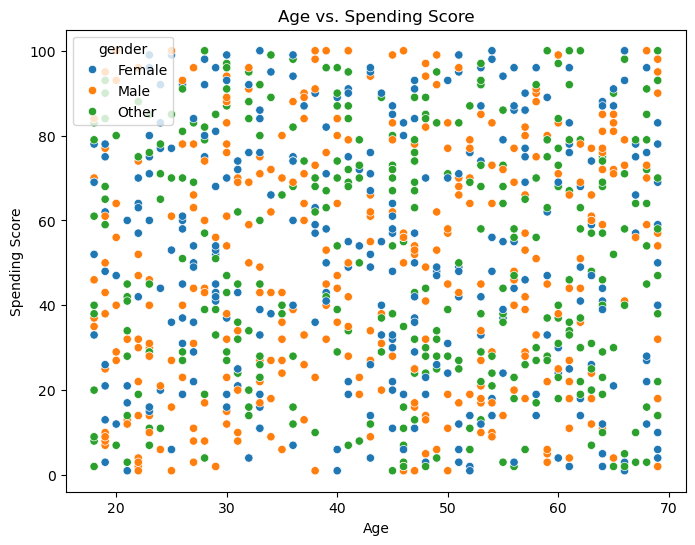

In [27]:
# Age vs. Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='spending_score', data=df_cs, hue='gender')
plt.title('Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

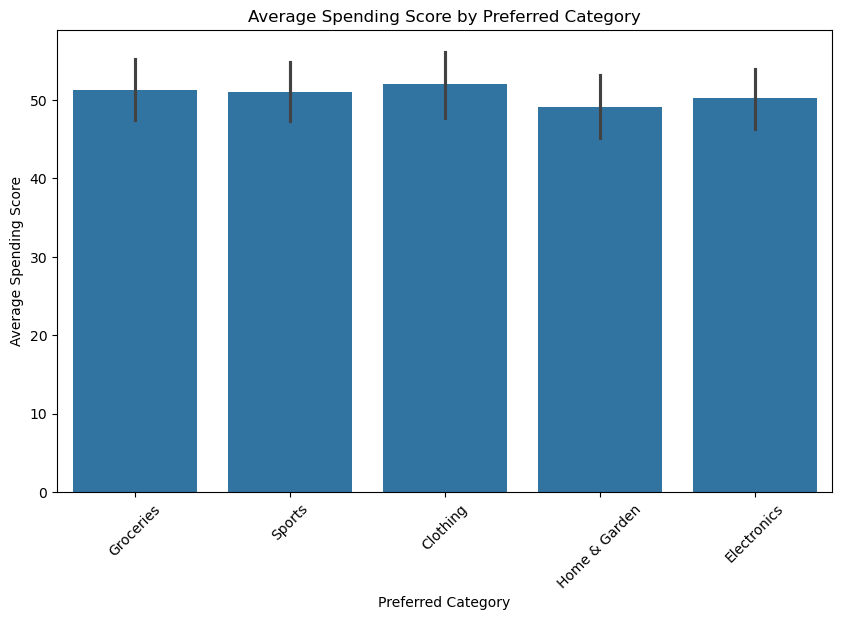

In [45]:
# Average spending score by preferred category
plt.figure(figsize=(10, 6))
sns.barplot(x='preferred_category', y='spending_score', data=df_cs)
plt.title('Average Spending Score by Preferred Category')
plt.xlabel('Preferred Category')
plt.ylabel('Average Spending Score')
plt.xticks(rotation=45)
plt.show()

**We can see from above graph Certain categories like Clotihing have higher average spending scores.**

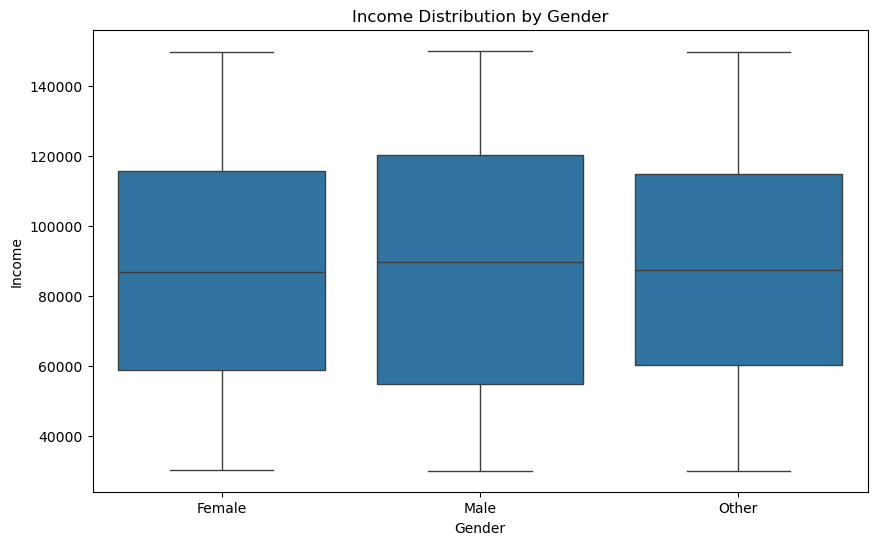

In [46]:
# Income vs. Spending Score by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='income', data=df_cs)
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

**The box plot displays the spread and central tendency of income for each gender. It helps identify any income disparities between genders and 
shows howincome is distributed within each gender category.**
    

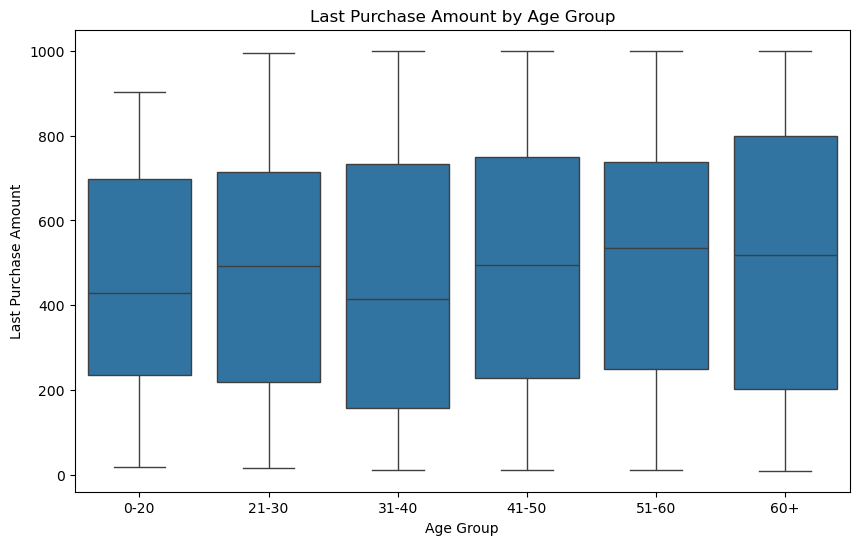

In [49]:
# Create age groups
df_cs['age_group'] = pd.cut(df_cs['age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])

# Box plot of last purchase amount by age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='last_purchase_amount', data=df_cs)
plt.title('Last Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Last Purchase Amount')
plt.show()

**By analyzing this box plot, we can gain insights into how Last Purchase Amount varies across different age segments, which can be valuable for tailoring marketing strategies and understanding customer segments better.**

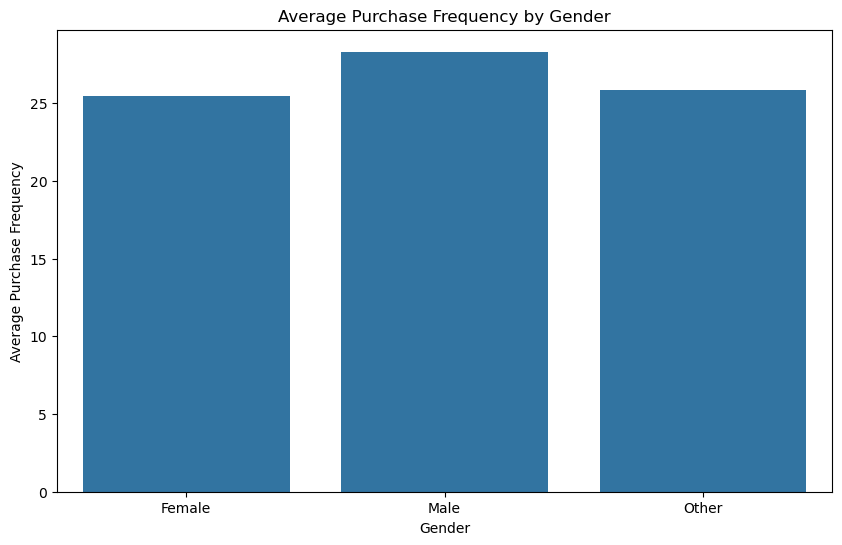

In [51]:
# Average purchase frequency by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='purchase_frequency', data=df_cs, errorbar=None)
plt.title('Average Purchase Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Frequency')
plt.show()

**Most of the purchase was made in last year by Males.**

# **Multivariate Analysis**

Multivariate Analysis is the analysis of more that two variables (Columns) of given dataset to check the relationship and 
interaction between them. Visualize the data by plotting the right graph understanding of more than two variables. 

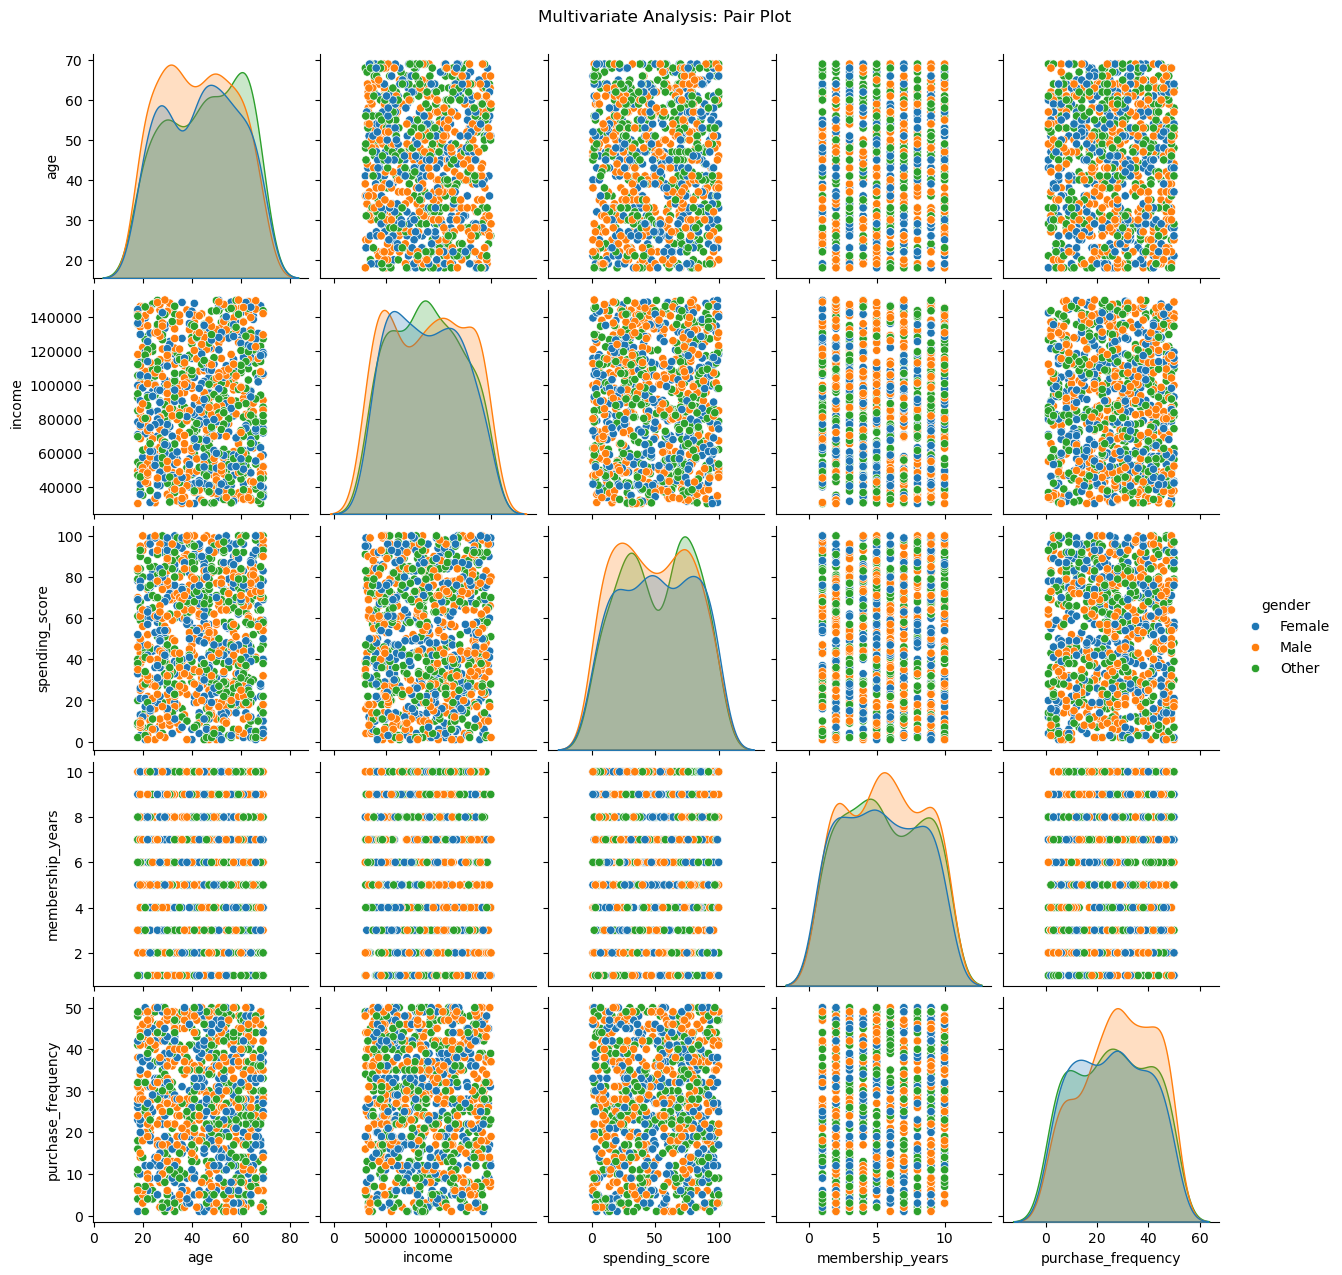

In [38]:
# Checking if 'gender' column is in the DataFrame
if 'gender' in df_cs.columns:
    sns.pairplot(df_cs[['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'gender']], hue='gender')
    plt.suptitle('Multivariate Analysis: Pair Plot', y=1.02)
    plt.show()
else:
    print("The column 'gender' is not present in the DataFrame.")

**Displays pairwise relationships between age, income, spending score, membership years, and purchase frequency, with different hues for gender.**

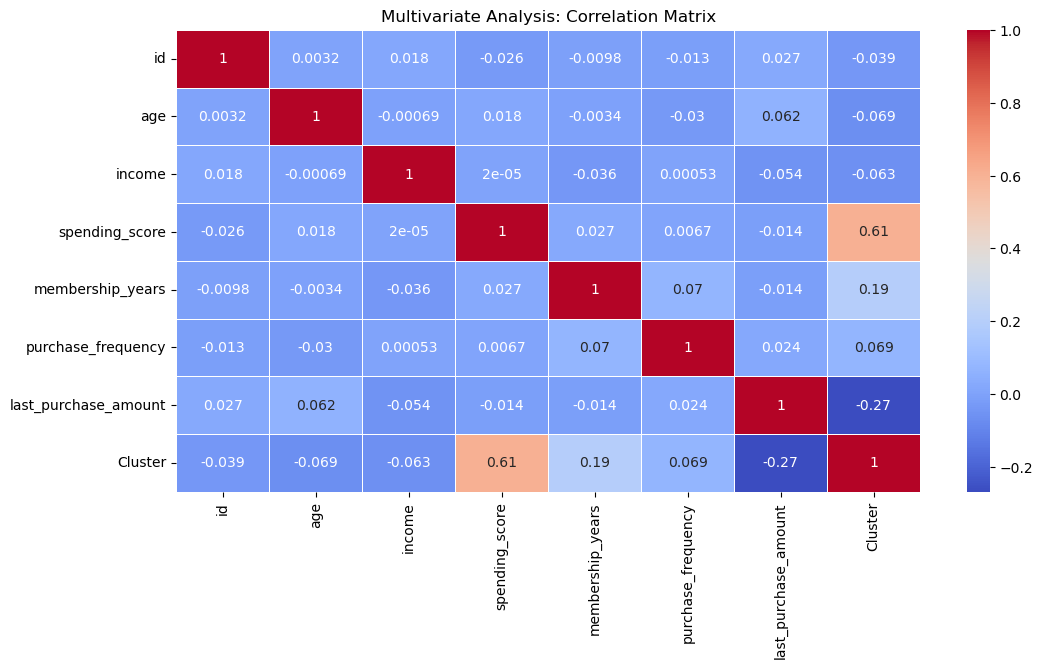

In [40]:
# Select only numeric columns
numeric_df_cs = df_cs.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df_cs.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Multivariate Analysis: Correlation Matrix')
plt.show()

**Shows the correlation between numerical variables to understand their relationships.**

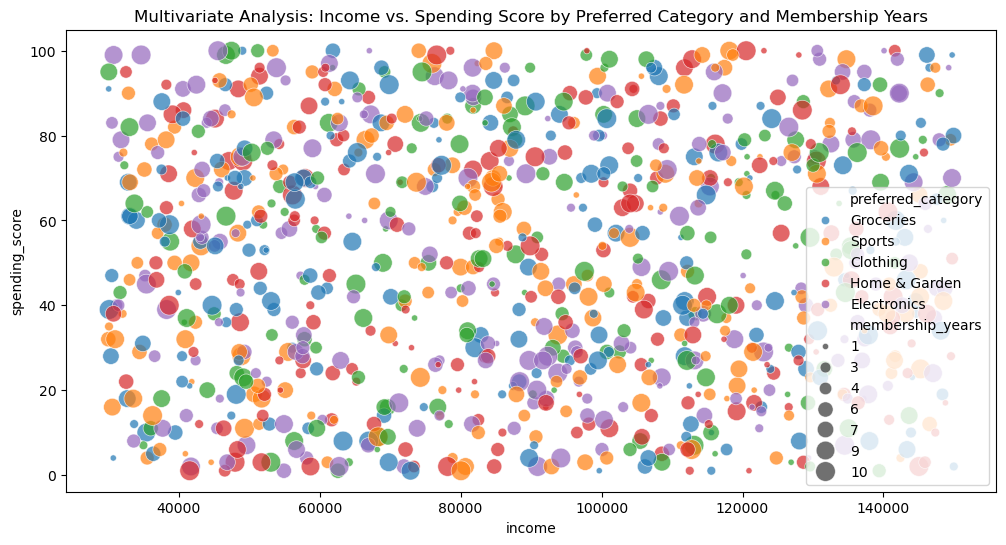

In [42]:
## Bubble Chart
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cs, x='income', y='spending_score', hue='preferred_category', size='membership_years', sizes=(20, 200), alpha=0.7)
plt.title('Multivariate Analysis: Income vs. Spending Score by Preferred Category and Membership Years')
plt.show()

**Visualizes the relationship between income and spending score, with preferred category as hue and membership years as bubble size.**